In [25]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interactive

In [27]:
def grover_demo (N = 100, randomness = 1.0, iterations = 100):
    
    # make weighted probability amplitudes
    unif_vals = np.repeat(1/np.sqrt(N), N)
    rand_vals = np.random.rand(N)
    weighted_vals = unif_vals * (1 - randomness) + rand_vals * randomness

    # normalize
    totalProb = 0
    for amp in weighted_vals:
        totalProb += amp **2   
    vals = weighted_vals / totalProb
    
    y_amp = np.zeros(iterations)
    xs = np.arange(0, iterations)
    means = np.zeros(iterations)

    iters = []
    count = 0
    maxs = []

    i = 0
    while (i < iterations):
        vals[0] = -vals[0]
        mean = np.mean(vals)
        vals = mean * 2 - vals
        y_amp[i] = vals[0]

        if (i > 3 and y_amp[i] < y_amp[i - 1] and y_amp[i - 1] > y_amp[i - 2]):
            iters.append(count)
            maxs.append(y_amp[i - 1])
            count += 1

        means[i] = mean

        i += 1

    plt.plot(xs, y_amp)
    plt.plot(xs, means)
    plt.show()

interactive(grover_demo, N=(1, 1000), randomness=(0.0, 1.0), iterations=(1, 1000))


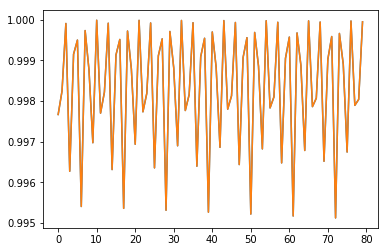

In [4]:
plt.plot(iters, maxs)
plt.show()